In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [29]:
df_raw = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
df_raw.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [30]:
df = df_raw.copy()

df.drop(columns = ['PassengerId', 'Name'], inplace = True)

for col in ['CryoSleep', 'VIP', 'Transported']:
    df[col] = df[col].map({False:0, True:1})
    

df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1
2,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1


<Axes: xlabel='Transported', ylabel='count'>

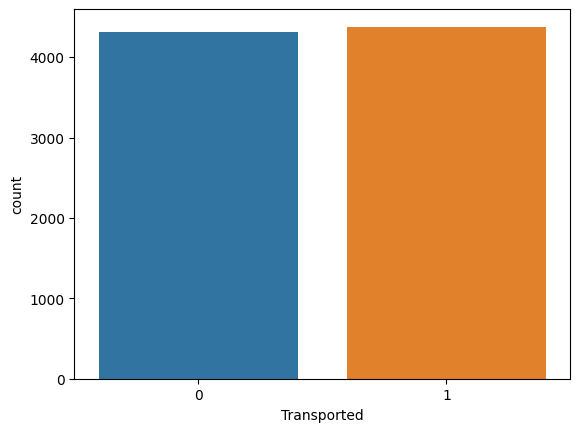

In [31]:
sns.countplot(data = df, x = 'Transported')
# Pretty balance problem

<Axes: xlabel='HomePlanet', ylabel='count'>

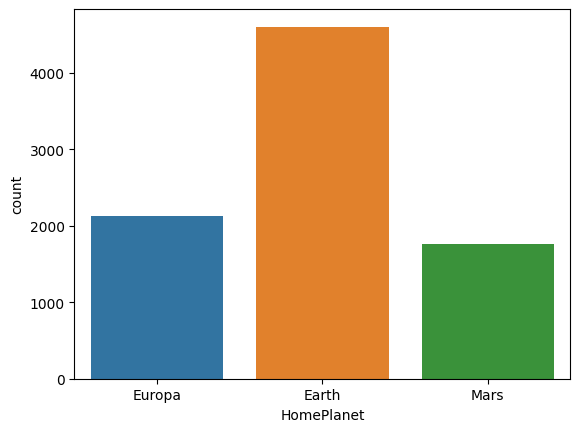

In [32]:
sns.countplot(data = df, x = 'HomePlanet')

<Axes: xlabel='Destination', ylabel='count'>

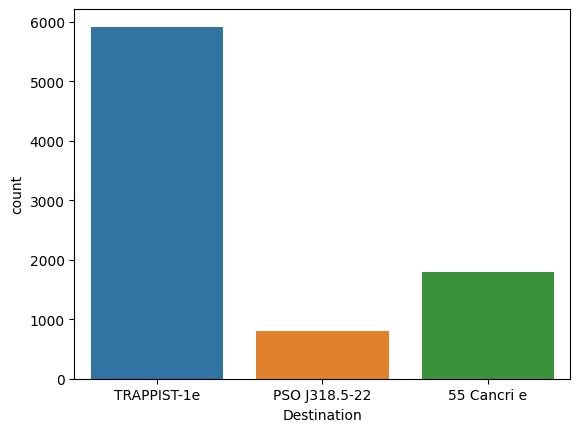

In [33]:
sns.countplot(data = df, x = 'Destination')

<Axes: xlabel='Destination', ylabel='count'>

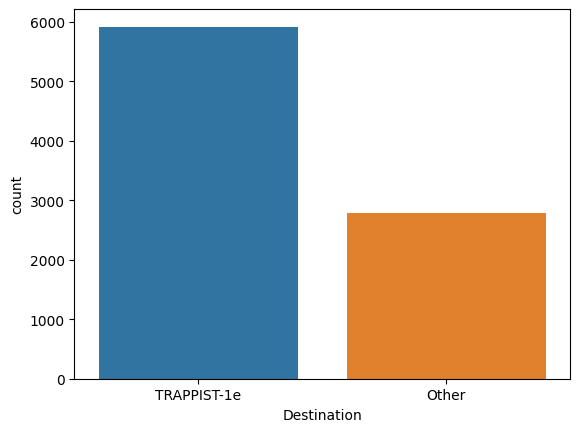

In [34]:
df.Destination = df.Destination.apply(lambda x: 'Other' if x != 'TRAPPIST-1e' else x)
sns.countplot(data = df, x = 'Destination')

<Axes: xlabel='Age', ylabel='count'>

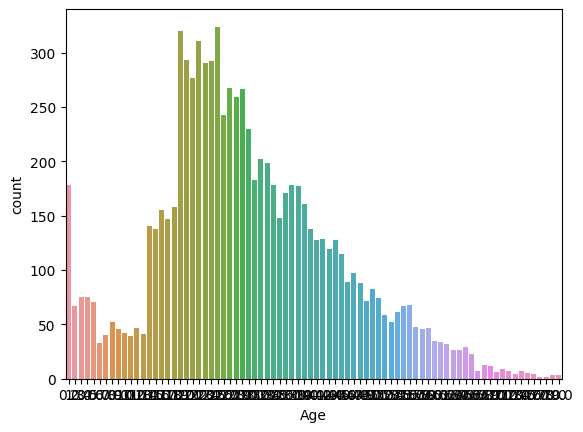

In [35]:
sns.countplot(data = df, x = 'Age')

<Axes: xlabel='Age', ylabel='count'>

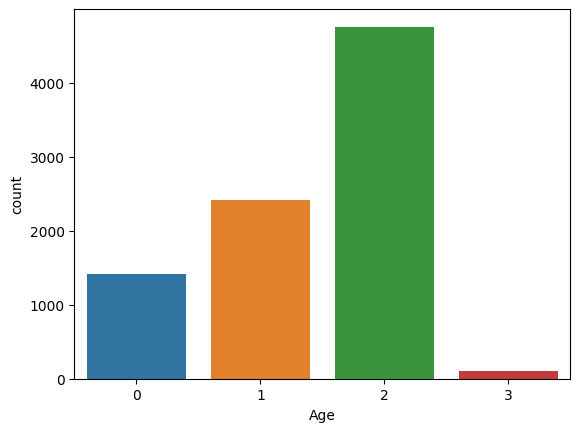

In [36]:
def age_cat(age):
    if age>=65: return 3 #'senior'
    elif 24<age and age<65: return 2 #'adult'
    elif 15<age and age<=24: return 1 #'youth'
    else: return 0 #'child'

df.Age = df.Age.apply(lambda a: age_cat(a))
sns.countplot(data = df, x = 'Age')


In [37]:
df['Cabin'] = df['Cabin'].apply(lambda x: str(x))
df['deck'] = df['Cabin'].apply(lambda x: x[0])
df['side'] = df['Cabin'].apply(lambda x: x[-1])
df['num'] = df['Cabin'].apply(lambda x: x[-3])
df[['deck', 'side','Cabin']].head()

,deck,side,Cabin
0,B,P,B/0/P
1,F,S,F/0/S
2,A,S,A/0/S
3,A,S,A/0/S
4,F,S,F/1/S


In [38]:
df.drop(columns = ['Cabin'], inplace = True)

In [39]:
df['spending'] = df.RoomService+ df.FoodCourt+df.ShoppingMall+df.Spa+df.VRDeck
df.drop(columns = ['RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], inplace = True)

In [40]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,deck,side,num,spending
0,Europa,0.0,TRAPPIST-1e,2,0.0,0,B,P,0,0.0
1,Earth,0.0,TRAPPIST-1e,1,0.0,1,F,S,0,736.0
2,Europa,0.0,TRAPPIST-1e,2,1.0,0,A,S,0,10383.0
3,Europa,0.0,TRAPPIST-1e,2,0.0,0,A,S,0,5176.0
4,Earth,0.0,TRAPPIST-1e,1,0.0,1,F,S,1,1091.0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   8492 non-null   object 
 1   CryoSleep    8476 non-null   float64
 2   Destination  8693 non-null   object 
 3   Age          8693 non-null   int64  
 4   VIP          8490 non-null   float64
 5   Transported  8693 non-null   int64  
 6   deck         8693 non-null   object 
 7   side         8693 non-null   object 
 8   num          8693 non-null   object 
 9   spending     7785 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 679.3+ KB


In [42]:
#dealing with missing values
df.HomePlanet.fillna('Earth', inplace = True)
df.CryoSleep.fillna(0, inplace = True)
df.VIP.fillna(0, inplace = True)
df.spending.fillna(0, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   8693 non-null   object 
 1   CryoSleep    8693 non-null   float64
 2   Destination  8693 non-null   object 
 3   Age          8693 non-null   int64  
 4   VIP          8693 non-null   float64
 5   Transported  8693 non-null   int64  
 6   deck         8693 non-null   object 
 7   side         8693 non-null   object 
 8   num          8693 non-null   object 
 9   spending     8693 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 679.3+ KB


/tmp/ipykernel_24/1955569866.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.HomePlanet.fillna('Earth', inplace = True)
/tmp/ipykernel_24/1955569866.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [43]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,deck,side,num,spending
0,Europa,0.0,TRAPPIST-1e,2,0.0,0,B,P,0,0.0
1,Earth,0.0,TRAPPIST-1e,1,0.0,1,F,S,0,736.0
2,Europa,0.0,TRAPPIST-1e,2,1.0,0,A,S,0,10383.0
3,Europa,0.0,TRAPPIST-1e,2,0.0,0,A,S,0,5176.0
4,Earth,0.0,TRAPPIST-1e,1,0.0,1,F,S,1,1091.0


## Encoding Categorical Variables

In [44]:
#Categorical Encoding
cat_cols = list(df.columns)
cat_cols.remove('spending')
cat_cols

['HomePlanet',
 'CryoSleep',
 'Destination',
 'Age',
 'VIP',
 'Transported',
 'deck',
 'side',
 'num']

In [45]:
def label_encoder(df_, cat_cols):
    
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()

    for col in cat_cols:
        df_[col] = le.fit_transform(df_[col])

    return df_

In [46]:
df_en = label_encoder(df.copy(), cat_cols) # encoded df
df_en.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,deck,side,num,spending
0,1,0,1,2,0,0,1,0,0,0.0
1,0,0,1,1,0,1,5,1,0,736.0
2,1,0,1,2,1,0,0,1,0,10383.0
3,1,0,1,2,0,0,0,1,0,5176.0
4,0,0,1,1,0,1,5,1,1,1091.0


In [47]:
df_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   8693 non-null   int64  
 1   CryoSleep    8693 non-null   int64  
 2   Destination  8693 non-null   int64  
 3   Age          8693 non-null   int64  
 4   VIP          8693 non-null   int64  
 5   Transported  8693 non-null   int64  
 6   deck         8693 non-null   int64  
 7   side         8693 non-null   int64  
 8   num          8693 non-null   int64  
 9   spending     8693 non-null   float64
dtypes: float64(1), int64(9)
memory usage: 679.3 KB


## Normalizing Numerical Columns

In [48]:
def normalizer(df_, n_cols):
    from sklearn.preprocessing import MinMaxScaler
    for col  in n_cols:
        # df[col]=(df[col]-df[col].mean())/df[col].std()
        df_[col]=(df_[col]-df_[col].min())/(df_[col].max()-df_[col].min())
    return df_

In [49]:
df_p = normalizer(df_en.copy(), ['spending']) # processed df
df_p.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,deck,side,num,spending
0,1,0,1,2,0,0,1,0,0,0.000000
1,0,0,1,1,0,1,5,1,0,0.020452
2,1,0,1,2,1,0,0,1,0,0.288521
3,1,0,1,2,0,0,0,1,0,0.143830
4,0,0,1,1,0,1,5,1,1,0.030317


<Axes: >

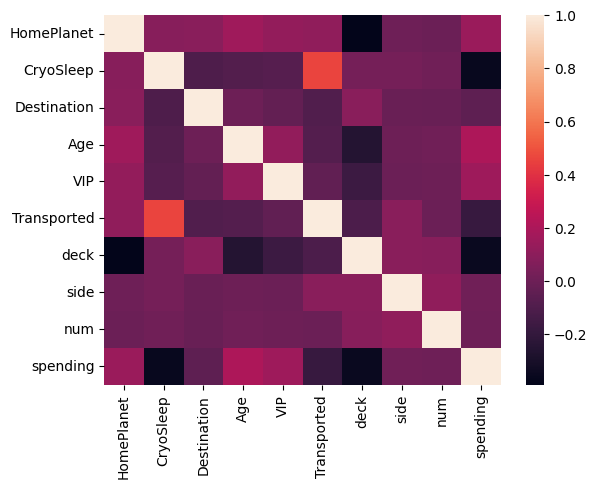

In [50]:
cm = df_p.corr()
import seaborn as sns

sns.heatmap(cm)

No obviouse correlation among the features.

# Model Development

In [51]:
Y = df_p.Transported
X = df_p.drop(columns = 'Transported')

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

## Random Forest
Lets start with DT's as I think there are some nuances in the data cleaning that I need to take care of, but DT isnt sensetive to.

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 3, random_state = 42, n_estimators = 200)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.70      0.83      0.76       861
           1       0.80      0.65      0.72       878

    accuracy                           0.74      1739
   macro avg       0.75      0.74      0.74      1739
weighted avg       0.75      0.74      0.74      1739



## Gradient Boosting

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators = 200, random_state = 42, max_depth = 3)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.79      0.76       861
           1       0.78      0.70      0.74       878

    accuracy                           0.75      1739
   macro avg       0.75      0.75      0.75      1739
weighted avg       0.75      0.75      0.75      1739



Gradient Boosting is doing slightly better. Let's see how linear regression does

## Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.81      0.74       861
           1       0.77      0.63      0.70       878

    accuracy                           0.72      1739
   macro avg       0.73      0.72      0.72      1739
weighted avg       0.73      0.72      0.72      1739



Gradient Boosting seems to be doing a little bit better. Let's see if we can tune the model and increase it's validation score. A better comparison would be ROC curve:

## Model Cmparison

In [72]:
from sklearn.metrics import roc_auc_score

auc_rf = roc_auc_score(y_val, rf.predict_proba(X_val)[:, 1])
auc_gb = roc_auc_score(y_val, gb.predict_proba(X_val)[:, 1])
auc_lr = roc_auc_score(y_val, lr.predict_proba(X_val)[:, 1])

print(f"AUC for Random Forest: {auc_rf}")
print(f"AUC for Gradient Boosting: {auc_gb}")
print(f"AUC for Logistic Regression: {auc_lr}")

AUC for Random Forest: 0.7966606610420155
AUC for Gradient Boosting: 0.8196176242595488
AUC for Logistic Regression: 0.7759439016453294


Now we can confidently say Gradient boosting is a better model for this problem.

## Tuning Gradient Bossting

In [89]:
# Define the parameter grid
param_grid = {
    'n_estimators': [200, 300, 400],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [4, 5, 6],
    'subsample': [0.6, 0.8, 1]
}

In [94]:
from sklearn.model_selection import RandomizedSearchCV

rscv = RandomizedSearchCV(estimator = gb, param_distributions = param_grid, cv = 3, scoring = 'accuracy', return_train_score = True, verbose = 1)

rscv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=GradientBoostingClassifier(learning_rate=0.01,
                                                        max_depth=5,
                                                        n_estimators=300,
                                                        random_state=42,
                                                        subsample=0.8),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [4, 5, 6],
                                        'n_estimators': [200, 300, 400],
                                        'subsample': [0.6, 0.8, 1]},
                   return_train_score=True, scoring='accuracy', verbose=1)

In [95]:
print("Best parameters:", rscv.best_params_)
print("Best score:", rscv.best_score_)

Best parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.01}
Best score: 0.7415875754961173


In [96]:
gb = GradientBoostingClassifier(n_estimators = 300, random_state = 42, max_depth = 6, subsample = 0.8, learning_rate = 0.01)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.85      0.77       861
           1       0.82      0.65      0.73       878

    accuracy                           0.75      1739
   macro avg       0.76      0.75      0.75      1739
weighted avg       0.76      0.75      0.75      1739

